# Assignment 1: My Heart Will Go On (but not yours?!?)

Today's assignment was inspired by a student's question, wondering if network analysis could be applied to the Titanic dataset. Instead of using the somewhat tragic dataset about surviving or perishing in the Titanic disaster, we will focus on the events leading up to it and try to solve the mystery behind why Rose didn't help Jack from dying.

<img title='Titanic' style="float: right;" src='https://www.firstforwomen.com/wp-content/uploads/sites/2/2024/09/kate-winslet-titanic.jpg?w=953&quality=86&strip=all' width="700">

We will use **James Cameron’s** 1997 film [Titanic](https://www.imdb.com/title/tt0120338/), starring Leonardo DiCaprio (as Jack) and Kate Winslet (as Rose). The film is based on a partly true story, though with a few inaccuracies.

One example is [Violet Jessop](https://www.youtube.com/watch?v=ERDHDAR3ZsU&ab_channel=titanicstories), a woman who survived the RMS Olympic (1911), RMS Titanic (1912), and later the HMHS Britannic (1916), which sank after hitting a German naval mine. In the film, she was depicted as an elderly Third-Class stewardess, instead of a First-Class stewardess who was about 24 years old.


### Dataset
Dataset consists of two files: **edges.csv** & **nodes.csv**. The names of the file should be selfexpenatory. Data was constructed from film's script, published [here](https://imsdb.com/scripts/Titanic.html), and present the coocurence of the characters in each scene. Both files are in the github repository of the assigment.  

In **edges.csv** the Weight column presents the number of coocurences for characters, and should be used in the assigment. 

## Instructions:

Follow all 4 objectives. For each objective, calculate and/or visualize the results, and provide explanations of **WHAT** you used to accomplish the task, **WHY** you chose that approach, and most importantly, your **understanding of the results**. **LET'S HYPOTHESIZE** that Rose could have saved Jack, so at the end, provide your reasoning as to why she didn't save him (there’s no right answer to this :)).

You can simply rename this file and submit it. If you'd like, you can also create a video presentation. Making a video is a great exercise for students who are struggling with oral exams.

Over the weekend, I will review the submissions, and at the beginning of next week, I will schedule a Teams meeting where we will slowly go through the objectives together.

HINT: Use Networx documentation!



## Objectives:
The primary objective is to construct a visual representation of a graph, representing the relationships and interactions among the characters in the Titanic dataset.

### 1. Graph Construction

In [1]:
# Essential libraries for network analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import networkx as nx

In [2]:
# Load the data
edges = pd.read_csv('edges.csv')
nodes = pd.read_csv('nodes.csv')

In [3]:
# Display the first few rows of each dataset to understand their structure
edges.head()

,Source,Target,Type,Id,Label,Weight,movie_id
0,5096932,5096969,Undirected,679,181587,1,828
1,5098606,5103789,Undirected,680,182039,1,828
2,5098606,5098095,Undirected,681,182094,1,828
3,5098606,5101061,Undirected,682,182036,1,828
4,5098606,5097941,Undirected,683,182037,1,828


In [4]:
edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Source    299 non-null    int64 
 1   Target    299 non-null    int64 
 2   Type      299 non-null    object
 3   Id        299 non-null    int64 
 4   Label     299 non-null    int64 
 5   Weight    299 non-null    int64 
 6   movie_id  299 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 16.5+ KB


In [5]:
nodes.head()

,Id,Label,Gender,movie_id,componentnumber,modularity_class
0,5097316,ROSE,F,828,0,0
1,5098095,JACK,M,828,0,3
2,5097875,CAL,M,828,0,5
3,5098619,MOLLY,F,828,0,4
4,5098545,SMITH,M,828,0,2


In [6]:
nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                70 non-null     int64 
 1   Label             70 non-null     object
 2   Gender            70 non-null     object
 3   movie_id          70 non-null     int64 
 4   componentnumber   70 non-null     int64 
 5   modularity_class  70 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 3.4+ KB


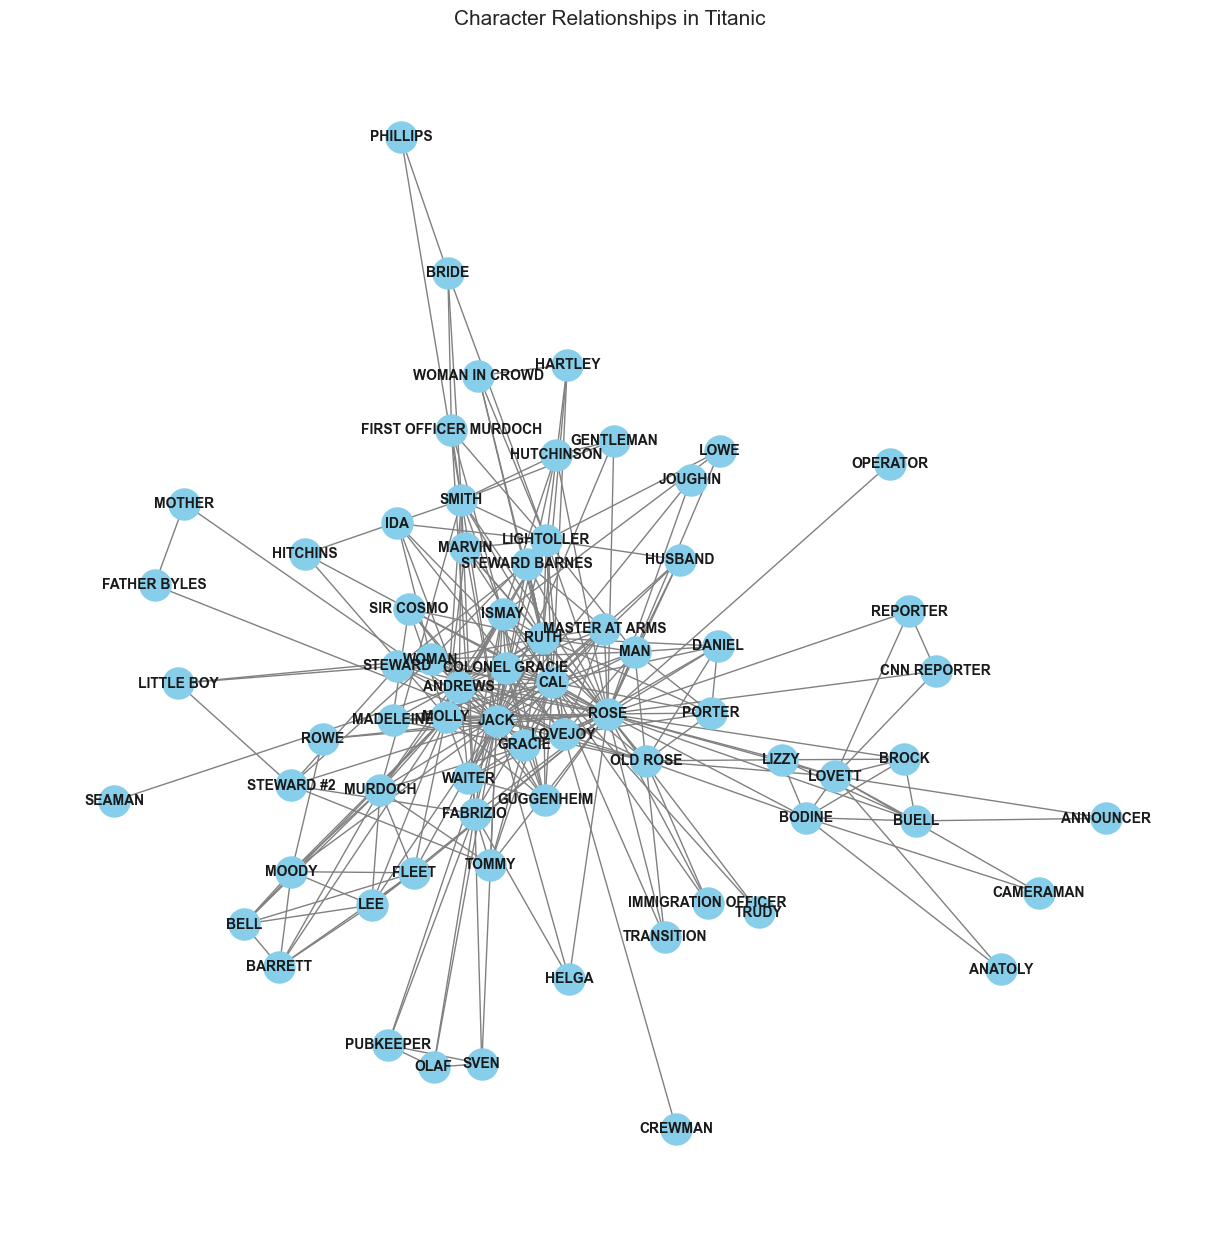

In [7]:

# Create a graph using the provided data
G = nx.Graph()

# Add nodes with character names (labels) and gender
for index, row in nodes.iterrows():
    G.add_node(row['Id'], label=row['Label'], gender=row['Gender'])

# Add edges to the graph
for index, row in edges.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'], label=row['Label'])

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42) 

# Use character names instead of IDs
node_labels = nx.get_node_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=500, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")

# Display the graph
plt.title("Character Relationships in Titanic", size=15)
plt.show()


First I started form importing essential libraries for data handling, visualization, and network analysis, including pandas, matplotlib, and networkx. 

Then I load  the "edges" and "nodes" data from CSV files and inspects the structure of the datasets.

Next I created a graph using networkx, where characters from Titanic are added as nodes with their names , and relationships between them are added as edges. The graph is visualized using the spring_layout method, displaying character names instead of IDs. 


### 2. Graph Analysis
Determinate the basic graph indicators:
**Total number of nodes and edges**: to understand the *scale and complexity* of the graph
**Average degree**: giving an average of *connections per node*
**Graph density**:  providing an insight into the *overall connectivity*

In [8]:
# Let's print names of  all the nodes

node_names = nx.get_node_attributes(G, 'label')
node_names  

{5097316: 'ROSE',
 5098095: 'JACK',
 5097875: 'CAL',
 5098619: 'MOLLY',
 5098545: 'SMITH',
 5101061: 'LIGHTOLLER',
 5096969: 'LOVETT',
 5097941: 'LOVEJOY',
 5098606: 'ANDREWS',
 5097894: 'RUTH',
 5098041: 'OLD ROSE',
 5096948: 'BODINE',
 5098128: 'FABRIZIO',
 5098463: 'WOMAN',
 5098583: 'ISMAY',
 5101981: 'MURDOCH',
 5100134: 'STEWARD',
 5097212: 'BUELL',
 5101285: 'FLEET',
 5101840: 'LEE',
 5100235: 'SIR COSMO',
 5098242: 'MOODY',
 5102690: 'STEWARD #2',
 5099090: 'GRACIE',
 5098717: 'TOMMY',
 5097994: 'MAN',
 5101041: 'BRIDE',
 5098541: 'FIRST OFFICER MURDOCH',
 5098267: 'ROWE',
 5099110: 'COLONEL GRACIE',
 5103242: 'HITCHINS',
 5097505: 'LIZZY',
 5099096: 'MASTER AT ARMS',
 5102237: 'STEWARD BARNES',
 5102267: 'HUTCHINSON',
 5103072: 'LOWE',
 5096932: 'ANATOLY',
 5097262: 'ANNOUNCER',
 5102009: 'BARRETT',
 5101998: 'BELL',
 5099349: 'BROCK',
 5097161: 'CAMERAMAN',
 5097296: 'CNN REPORTER',
 5102841: 'CREWMAN',
 5097979: 'DANIEL',
 5105151: 'FATHER BYLES',
 5102317: 'GENTLEMAN',
 510

In [9]:

# Print the basic graph information
print(f"Graph info:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Graph density: {nx.density(G)}")  # How close a graph is to being a complete graph


Graph info:
Number of nodes: 70
Number of edges: 299
Graph density: 0.12380952380952381


The graph contains 70 nodes (representing characters) and 299 edges (representing relationships between these characters). To count the total number of characters (nodes) and their relationships (edges) I used G.number_of_nodes() and G.number_of_edges().

The graph density of 0.124 means that only about 12.4% of possible connections between characters exist. It shows that the network is sparse — most characters only interact with a few others, not with everyone. If the density were 1.0, it would mean every character is connected to every other character.


### 3. Node analysis
Calculate basic centralities and compare the most central characters.

#### Degree centrality

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
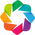

In [10]:
# Firt I have to import the libraries and link to the bokeh backend
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show


In [11]:
# Then, I'll compute the degree centrality and sort the top 10 most central nodes
cent_degree = dict(nx.degree(G))

# This code create a list of tuples, where each tuple has a name(from (node_labels.get(node_id)) and a degree (the numbers of conections). Then sorting all nodes by number of connections in descending order and then reciving a list of top 10 nodes with biggest nuber of conections 
top_10_nodes_with_names = [(node_labels.get(node_id), degree) for node_id, degree in sorted(cent_degree.items(), key=lambda x: -x[1])[:10]]

top_10_nodes_with_names

[('ROSE', 46),
 ('JACK', 39),
 ('CAL', 33),
 ('RUTH', 25),
 ('MOLLY', 23),
 ('LOVEJOY', 19),
 ('LIGHTOLLER', 18),
 ('ANDREWS', 17),
 ('ISMAY', 16),
 ('SMITH', 15)]

In [12]:
# Graph visualization degree centrality using Holoviews

# First I set node attributes (degree centrality for node size and names for hover)
nx.set_node_attributes(G, cent_degree, 'cent_degree')  # Assign degree centrality as a node attribute
node_labels = nx.get_node_attributes(G, 'label')  # Use character names from the 'label' attribute
nx.set_node_attributes(G, node_labels, 'name')  # Assign names to a 'name' attribute for hover

# Then create a layout for the graph using spring layout to space the nodes in visually balanced way
G_layout = nx.spring_layout(G, seed=42)

# Next create an interactive holoviews plot with hover information
g_plot = hv.Graph.from_networkx(G, G_layout).opts(
    tools=['hover'],  
    node_size='cent_degree',  
    node_color='skyblue',  
    edge_color='gray',  
    width=800, height=800,  
    inspection_policy='nodes',  
    hooks=[lambda plot, element: plot.handles['hover'].tooltips.append(('Character', '@name'))]  
)

# Show the plot
show(hv.render(g_plot))


The centrality analysis shows the most important characters based on their number of connections. 

Here are top 5 most important characters, who have the biggest number of connections:

ROSE 46

JACK 39

CAL  33

RUTH 25

MOLLY 23

These characters are more connected than others, making them central to the network.

### Betweenness centrality

In [13]:
# Now we'll compute the betweenness centrality and sort the top 10 most central nodes based on betweenness

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# This code also create a list of tuples, where each tuple has a name (from node_labels.get(node_id) and betweenes centrality score(representing how often a node lies on the shortest path between other nodes). Then sorts all nodes in descending order and return a list of top 10 nodes with the highest betweenes centrality scores
top_10_betweenness_with_names = [(node_labels.get(node_id), centrality) for node_id, centrality in sorted(betweenness_centrality.items(), key=lambda x: -x[1])[:10]]

# Display the top 10 nodes with their names and betweenness centrality values
top_10_betweenness_with_names


[('ROSE', 0.38293118370973905),
 ('JACK', 0.21846848051998496),
 ('CAL', 0.08946909760867143),
 ('MOLLY', 0.057111656969441114),
 ('SMITH', 0.05671679080030055),
 ('LIGHTOLLER', 0.04816379591871901),
 ('LOVETT', 0.04797574548213933),
 ('LOVEJOY', 0.04323784280582465),
 ('ANDREWS', 0.038160157645415194),
 ('RUTH', 0.03714119674594522)]

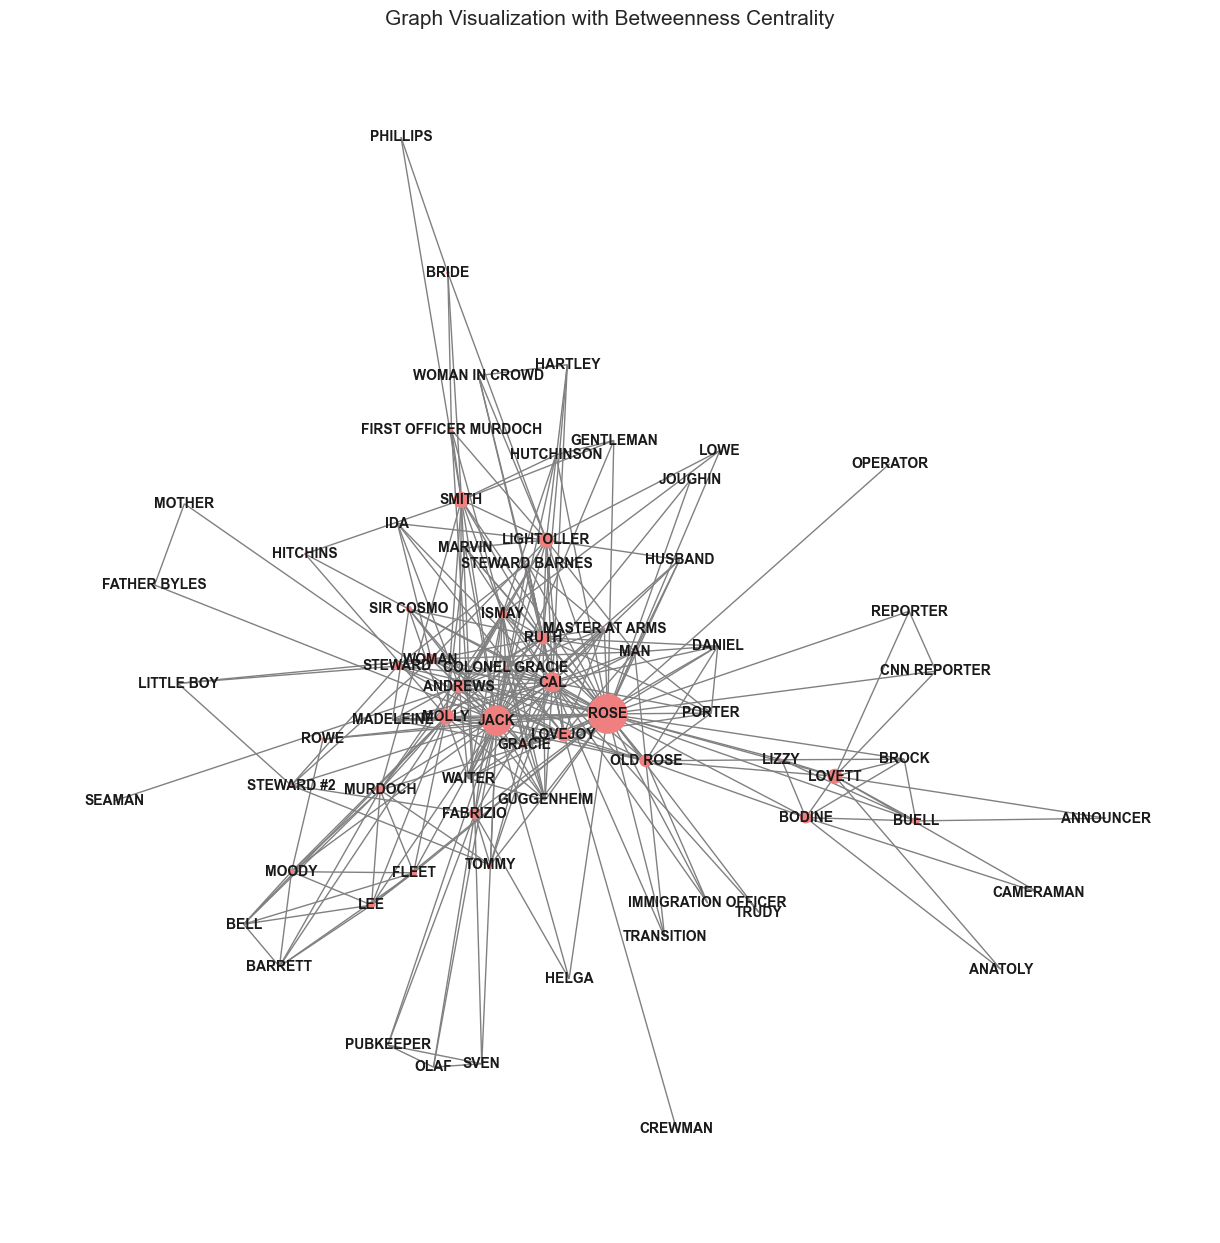

In [14]:
# Now let's visualize the entire graph with node sizes reflecting betweenness centrality.

# Create a layout for the graph, using nx.spring_layout to make graph visually balanced 
full_graph_layout = nx.spring_layout(G, seed=42)

# Drawing the betweenes centrality graph
plt.figure(figsize=(12, 12))
node_sizes_full = [betweenness_centrality[node] * 2000 for node in G.nodes()]  # Scale node sizes by betweenness centrality
node_labels_full = {node: node_labels[node] for node in G.nodes()}  # Use character names as labels
nx.draw(G, full_graph_layout, with_labels=True, labels=node_labels_full, node_size=node_sizes_full, node_color="lightcoral", edge_color="gray", font_size=10, font_weight="bold")
plt.title("Graph Visualization with Betweenness Centrality", size=15)
plt.show()


The betweenness centrality analysis shows the most important characters based on how often they act as bridges between others.

Here are the top 5 most important characters, who connect different parts of the network:

ROSE: 0.38

JACK: 0.22

CAL: 0.09

MOLLY: 0.057

SMITH: 0.057

These characters play key roles in linking various groups, making them crucial connectors in the network.

### Eigenvector centrality

In [15]:
# Now I'll compute the eigenvector centrality and sort the top 10 most central nodes based on eigenvector centrality.

# Compute eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# This code create a list of tuples with names and eigenvector centrality values and sorting values in descending order
top_10_eigenvector_with_names = [(node_labels.get(node_id), centrality) for node_id, centrality in sorted(eigenvector_centrality.items(), key=lambda x: -x[1])[:10]]

# Display the top 10 nodes with their names and eigenvector centrality values
top_10_eigenvector_with_names


[('ROSE', 0.34087722891204286),
 ('JACK', 0.31545304952687403),
 ('CAL', 0.30375511132308497),
 ('RUTH', 0.2669400985784739),
 ('MOLLY', 0.2326201649340831),
 ('ANDREWS', 0.20798359784530093),
 ('LOVEJOY', 0.20624631016766715),
 ('GRACIE', 0.19572954192362202),
 ('ISMAY', 0.18689641735756293),
 ('LIGHTOLLER', 0.18098802163739114)]

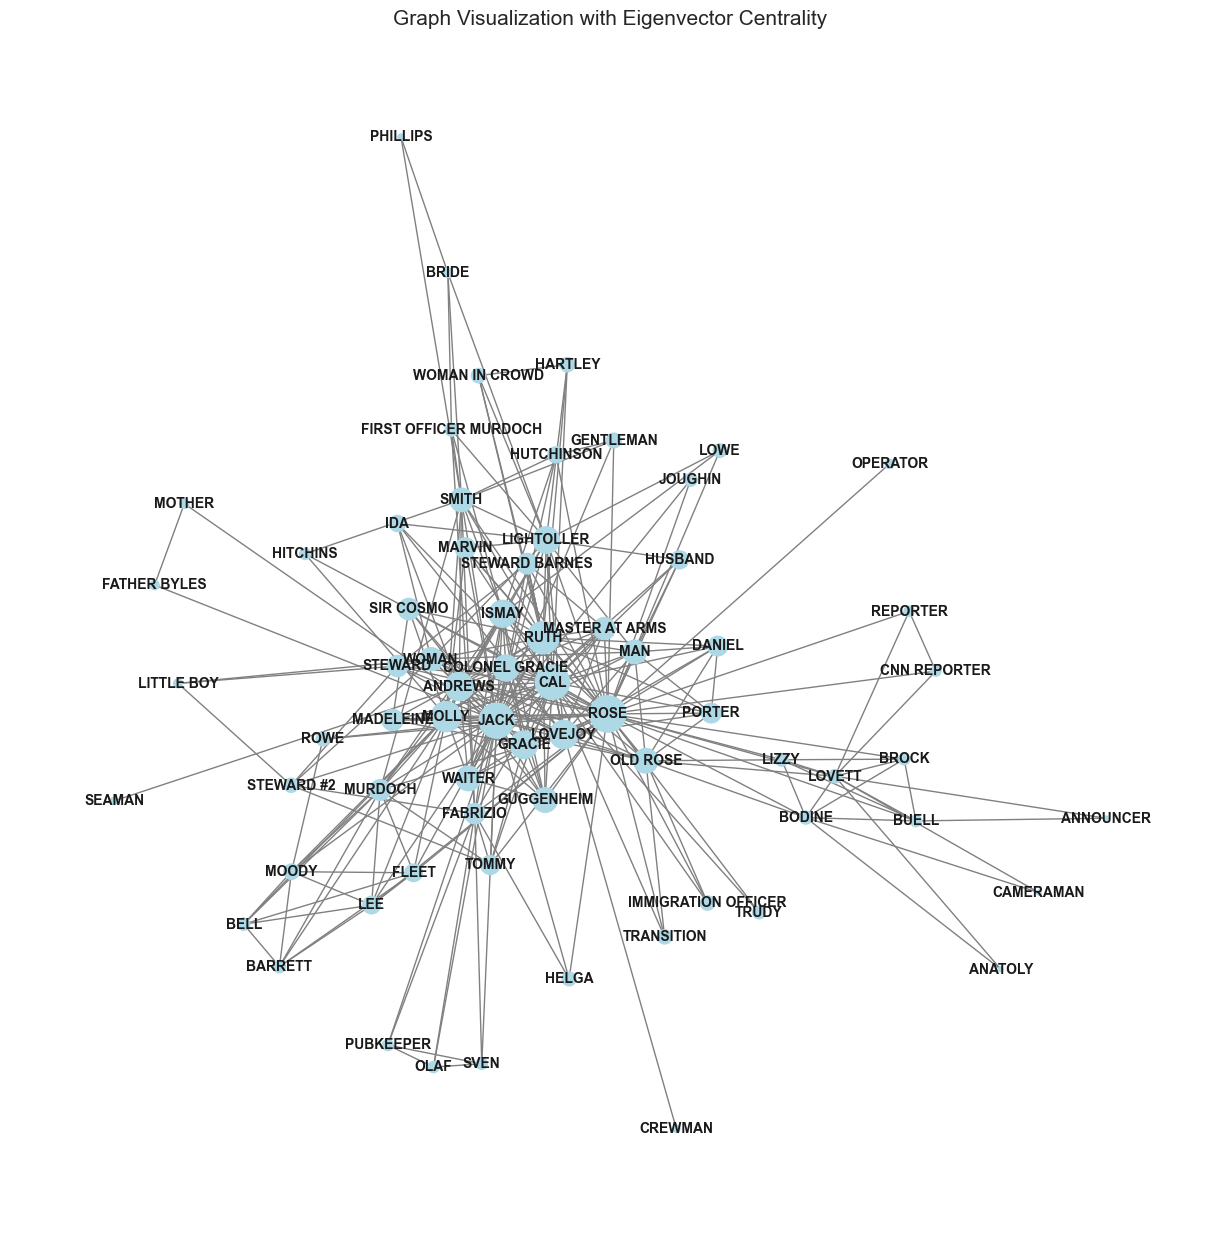

In [16]:
# Let's now visualize the full graph with node sizes reflecting eigenvector centrality.

# Create a layout of the graph
eigenvector_layout = nx.spring_layout(G, seed=42)

# Drawing the full graph
plt.figure(figsize=(12, 12))
node_sizes_eigenvector = [eigenvector_centrality[node] * 2000 for node in G.nodes()]  # Scale node sizes by eigenvector centrality
node_labels_eigenvector = {node: node_labels[node] for node in G.nodes()}  # Use character names as labels
nx.draw(G, eigenvector_layout, with_labels=True, labels=node_labels_eigenvector, node_size=node_sizes_eigenvector, node_color="lightblue", edge_color="gray", font_size=10, font_weight="bold")
plt.title("Graph Visualization with Eigenvector Centrality", size=15)
plt.show()


The eigenvector centrality analysis shows the most important characters based on their connections to other influential characters.

Here are the top 5 most important characters, who are highly connected to other key figures in the network:

ROSE: 0.34

JACK: 0.32

CAL: 0.30

RUTH: 0.27

MOLLY: 0.23

These characters have strong ties to other important individuals, making them central to the network’s overall influence and communication.

### Comparison


ROSE, JACK, and CAL are ranked highly across all three centrality measures.

It means  that they are not only well-connected (they have the biggest number of conections) but also act as key characters (betweenness centrality) and are connected to other important characters (eigenvector centrality).

MOLLY appears in all three rankings but is slightly less central than ROSE, JACK, and CAL.

RUTH and SMITH also appear, but they rank higher in specific centralities, indicating specialized roles in the network: RUTH is more connected to other influential characters (eigenvector), while SMITH plays a bridging role (betweenness).

Overall, ROSE, JACK, and CAL are the most central and influential characters across the network.

### 4. Node attributes
Add Gender attribute (from dataset to the network) and calculate and/or visualize the share of females and males characters in the film. Furthermore, subgraph network to only male characters. Who are the main characters, what is their relationship?



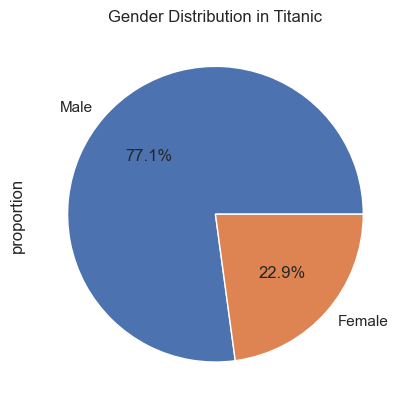

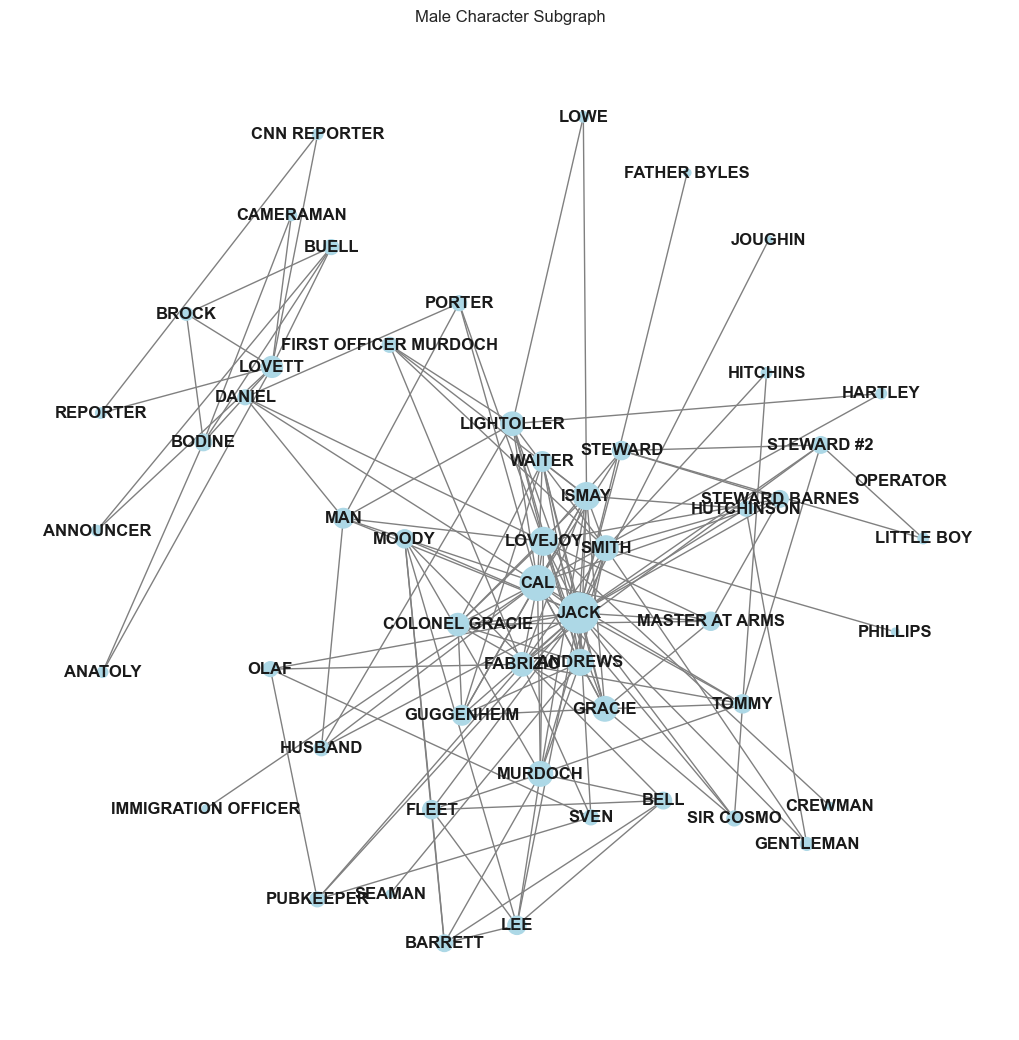

Top 5 Male Characters by degree centrality: 
JACK: 0.5472
CAL: 0.4151
LOVEJOY: 0.2642
ISMAY: 0.2453
ANDREWS: 0.2264


In [17]:
# Add Gender attribute to the Graph

# Get gender information from the nodes dataset and assign gender attribute to each character in the graph
gender = nodes.set_index('Id')['Gender'].to_dict()
nx.set_node_attributes(G, gender, 'gender')

# Calculate and Visualize Gender Distribution
gender_distribution = pd.Series(gender).value_counts(normalize=True) * 100  
gender_distribution.plot(kind='pie', autopct='%1.1f%%', labels=['Male', 'Female'], title='Gender Distribution in Titanic')

# Male Subgraph
# this code create a list containg only male nodes 
male_nodes = [n for n, attr in G.nodes(data=True) if attr['gender'] == 'M']  
male_subgraph = G.subgraph(male_nodes)  # this is a subgraph only with male characters

# Analyze degree centrality in male subgraph and return top 5 central male characters 
male_degree_centrality = nx.degree_centrality(male_subgraph)  # count degree centrality for male characters
top_male_characters = sorted(male_degree_centrality.items(), key=lambda x: -x[1])[:5]  

# Visualize the Male Subgraph (with names)
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(male_subgraph, seed=42, k=1.0)  
node_labels_male = {node: node_labels[node] for node in male_subgraph.nodes()} #names as labels 
# Draw the male subgraph with names 
nx.draw(male_subgraph, pos, with_labels=True, labels=node_labels_male, 
        node_size=[1500 * male_degree_centrality[node] for node in male_subgraph.nodes()],
        node_color="lightblue", edge_color="gray", font_size=12, font_weight="bold")
plt.title("Male Character Subgraph")
plt.show()

print("Top 5 Male Characters by degree centrality: ")
for node, score in top_male_characters:
    print(f"{node_labels[node]}: {score:.4f}")


From the gender distribution, we can see that most of the characters in Titanic were male, with a distribution of 77.1% male to 22.9% female

## FINAL ANSWER AND ARGUMENTATION

Looking at the network analysis, Jack was crucial to Rose's life. Even with fewer connections than Rose, he was truly life-changing for her. Jack acted as a bridge, helping Rose break away from her old life (betweenness centrality). 

Letting Jack go symbolized Rose's freedom. He was her hero. He showed her that a different life was possible. Jack helped her find herself and gave her the strength to move forward without him.